In [186]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [187]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Setting the number of categories

In [188]:
NUM_CLASSES = 9

# Load learning data

In [189]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [190]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# model building

In [192]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [193]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_44 (Dropout)        (None, 42)                0         
                                                                 
 dense_66 (Dense)            (None, 20)                860       
                                                                 
 dropout_45 (Dropout)        (None, 20)                0         
                                                                 
 dense_67 (Dense)            (None, 10)                210       
                                                                 
 dense_68 (Dense)            (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [194]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Early Abort Callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [195]:
# model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# model training

In [196]:
# Update number of classes
NUM_CLASSES = 9  # Update to the correct number of classes

# Rebuild model with correct number of output classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
68/73 [==========================>...] - ETA: 0s - loss: 2.1862 - accuracy: 0.1372
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.keras
73/73 [==============================] - 1s 5ms/step - loss: 2.1835 - accuracy: 0.1388 - val_loss: 2.1121 - val_accuracy: 0.2681
Epoch 2/1000
67/73 [==========================>...] - ETA: 0s - loss: 2.0944 - accuracy: 0.2034
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.keras
73/73 [==============================] - 0s 4ms/step - loss: 2.0917 - accuracy: 0.2045 - val_loss: 2.0083 - val_accuracy: 0.3579
Epoch 3/1000
61/73 [========================>.....] - ETA: 0s - loss: 2.0195 - accuracy: 0.2439
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.keras
73/73 [==============================] - 0s 4ms/step - loss: 2.0138 - accuracy: 0.2456 - val_loss: 1.8752 - val_accuracy: 0.4263
Epoch 4/1000
58/73 [======================>.......] - ETA: 0s - loss: 1.9390 - accuracy: 0.286

In [197]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [198]:
# model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

25/25 [==============================] - 0s 2ms/step - loss: 0.6146 - accuracy: 0.8742


97/97 [==============================] - 0s 1ms/step


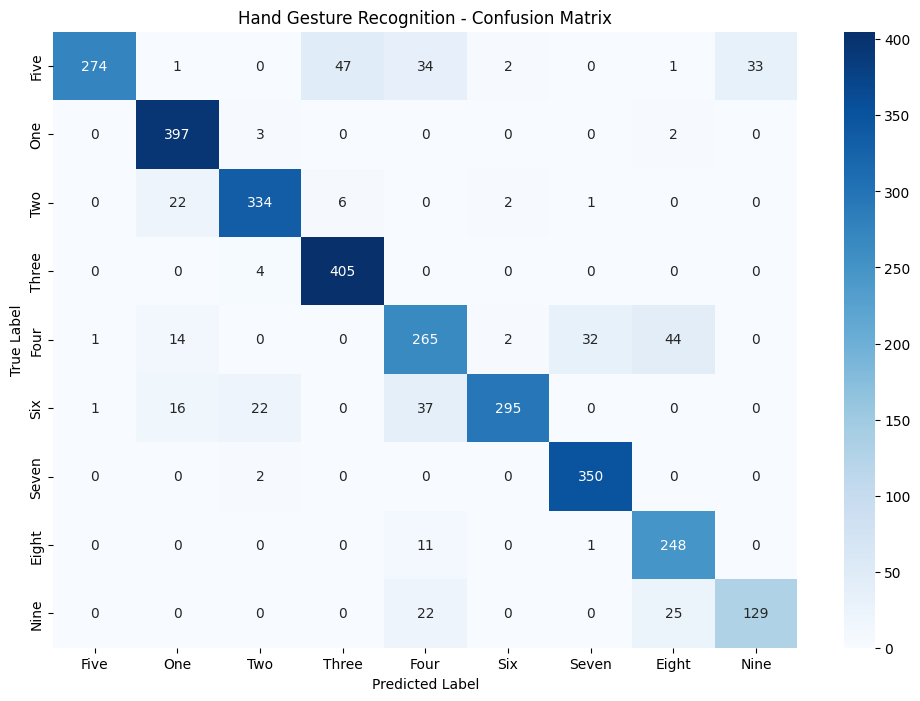


Classification Report:
              precision    recall  f1-score   support

        Five       0.99      0.70      0.82       392
         One       0.88      0.99      0.93       402
         Two       0.92      0.92      0.92       365
       Three       0.88      0.99      0.93       409
        Four       0.72      0.74      0.73       358
         Six       0.98      0.80      0.88       371
       Seven       0.91      0.99      0.95       352
       Eight       0.78      0.95      0.86       260
        Nine       0.80      0.73      0.76       176

    accuracy                           0.87      3085
   macro avg       0.87      0.87      0.86      3085
weighted avg       0.88      0.87      0.87      3085



In [199]:
# Import additional required libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

def visualize_results(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Load labels
    labels = []
    with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
              encoding='utf-8-sig') as f:
        for row in csv.reader(f):
            labels.append(row[0])
    
    # Use all class indices for consistent labeling
    class_indices = list(range(len(labels)))
    
    # Create confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes, labels=class_indices)
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    plt.title('Hand Gesture Recognition - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes, labels=class_indices, target_names=labels))

# Generate and display confusion matrix
visualize_results(model, X_test, y_test)

In [200]:
# Save visualization results
def save_results(model, X_test, y_test, save_path='model/evaluation/'):
    import os
    
    # Create directory if it doesn't exist
    os.makedirs(save_path, exist_ok=True)
    
    # Generate predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    
    # Load labels
    labels = []
    with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
              encoding='utf-8-sig') as f:
        for row in csv.reader(f):
            labels.append(row[0])
    
    # Use all class indices for consistent labeling
    class_indices = list(range(len(labels)))
    
    # Create and save confusion matrix
    cm = confusion_matrix(y_test, y_pred_classes, labels=class_indices)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, 
                annot=True, 
                fmt='d', 
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    plt.title('Hand Gesture Recognition - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.savefig(os.path.join(save_path, 'confusion_matrix.png'), 
                bbox_inches='tight', 
                dpi=300)
    plt.close()
    
    # Save classification report
    with open(os.path.join(save_path, 'classification_report.txt'), 'w') as f:
        f.write("Classification Report:\n")
        f.write(classification_report(y_test, y_pred_classes, labels=class_indices, target_names=labels))

# Save the results
save_results(model, X_test, y_test)

97/97 [==============================] - 0s 2ms/step


In [201]:
# Loading a saved model
model = tf.keras.models.load_model(model_save_path)

In [202]:
# Reasoning test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 108ms/step
[2.6649520e-01 1.0935113e-04 5.4885970e-07 2.8421238e-05 2.2564903e-01
 1.8341647e-03 1.3580291e-03 9.4952792e-02 4.0957239e-01]
8


# Mixed rows

97/97 [==============================] - 0s 2ms/step


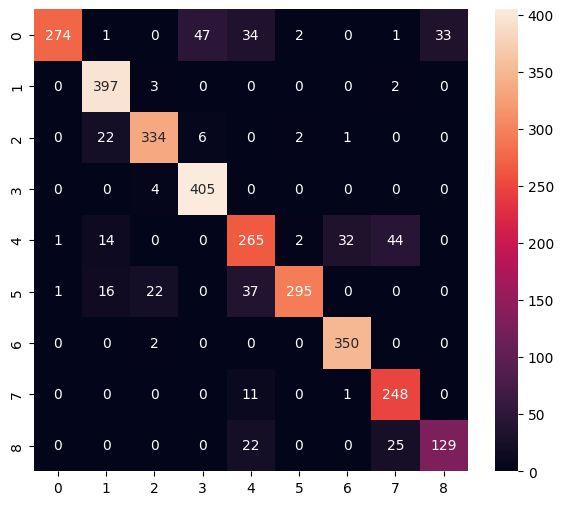

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       392
           1       0.88      0.99      0.93       402
           2       0.92      0.92      0.92       365
           3       0.88      0.99      0.93       409
           4       0.72      0.74      0.73       358
           5       0.98      0.80      0.88       371
           6       0.91      0.99      0.95       352
           7       0.78      0.95      0.86       260
           8       0.80      0.73      0.76       176

    accuracy                           0.87      3085
   macro avg       0.87      0.87      0.86      3085
weighted avg       0.88      0.87      0.87      3085



In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [204]:
def analyze_misclassifications(y_true, y_pred, save_dir='model/evaluation/'):
    """Analyze and display misclassifications with saved visualizations"""
    import os
    
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)
    
    # Load gesture labels
    labels = []
    with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
              encoding='utf-8-sig') as f:
        for row in csv.reader(f):
            labels.append(row[0])
    
    # Create misclassification matrix
    misclass_matrix = np.zeros((len(labels), len(labels)))
    for true_idx, pred_idx in zip(y_true, y_pred):
        if true_idx != pred_idx:
            misclass_matrix[true_idx][pred_idx] += 1
    
    # Create DataFrame
    df_misclass = pd.DataFrame(
        misclass_matrix,
        index=labels,
        columns=labels
    )
    
    # Save heatmap visualization
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_misclass, 
                annot=True,
                fmt='g',
                cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    
    plt.title('Hand Gesture Misclassifications')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    
    # Save heatmap
    plt.savefig(os.path.join(save_dir, 'misclassification_matrix.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Create bar plot
    plt.figure(figsize=(12, 6))
    misclass_counts = [(i, j, misclass_matrix[i][j]) 
                      for i in range(len(labels)) 
                      for j in range(len(labels)) 
                      if i != j and misclass_matrix[i][j] > 0]
    
    # Sort by count
    misclass_counts.sort(key=lambda x: x[2], reverse=True)
    
    # Prepare data for bar plot
    pairs = [f"{labels[i]}->{labels[j]}" for i, j, _ in misclass_counts]
    counts = [count for _, _, count in misclass_counts]
    
    # Create bar plot
    bars = plt.bar(pairs, counts)
    plt.xticks(rotation=45, ha='right')
    plt.title("Misclassification Distribution")
    plt.xlabel("True Label -> Predicted Label")
    plt.ylabel("Count")
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    
    # Save bar plot
    plt.savefig(os.path.join(save_dir, 'misclassification_distribution.png'), dpi=300, bbox_inches='tight')
    plt.close()
    
    # Save numerical results to text file
    with open(os.path.join(save_dir, 'misclassification_analysis.txt'), 'w') as f:
        f.write("=== Misclassification Analysis ===\n\n")
        f.write("True Label\tPredicted as\tCount\n")
        f.write("-" * 40 + "\n")
        for i, j, count in misclass_counts:
            f.write(f"{labels[i]}\t\t{labels[j]}\t\t{int(count)}\n")

# Run the analysis
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)
analyze_misclassifications(y_test, y_pred)

97/97 [==============================] - 0s 1ms/step


In [205]:

def analyze_class_distribution(y_true, y_pred, labels):
    """Analyze the distribution of classes in true and predicted data"""
    print("\nClass Distribution Analysis:")
    print("-" * 50)
    
    for i, label in enumerate(labels):
        true_count = np.sum(y_true == i)
        pred_count = np.sum(y_pred == i)
        print(f"Class '{label}':")
        print(f"  True samples: {true_count}")
        print(f"  Predicted samples: {pred_count}")
        print("-" * 30)

# Run the analysis after model predictions
Y_pred = model.predict(X_test)
y_pred_classes = np.argmax(Y_pred, axis=1)

# Load labels
labels = []
with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
          encoding='utf-8-sig') as f:
    for row in csv.reader(f):
        labels.append(row[0])

# Analyze class distribution
analyze_class_distribution(y_test, y_pred_classes, labels)

97/97 [==============================] - 0s 1ms/step

Class Distribution Analysis:
--------------------------------------------------
Class 'Five':
  True samples: 392
  Predicted samples: 276
------------------------------
Class 'One':
  True samples: 402
  Predicted samples: 450
------------------------------
Class 'Two':
  True samples: 365
  Predicted samples: 365
------------------------------
Class 'Three':
  True samples: 409
  Predicted samples: 458
------------------------------
Class 'Four':
  True samples: 358
  Predicted samples: 369
------------------------------
Class 'Six':
  True samples: 371
  Predicted samples: 301
------------------------------
Class 'Seven':
  True samples: 352
  Predicted samples: 384
------------------------------
Class 'Eight':
  True samples: 260
  Predicted samples: 320
------------------------------
Class 'Nine':
  True samples: 176
  Predicted samples: 162
------------------------------


97/97 [==============================] - 0s 2ms/step


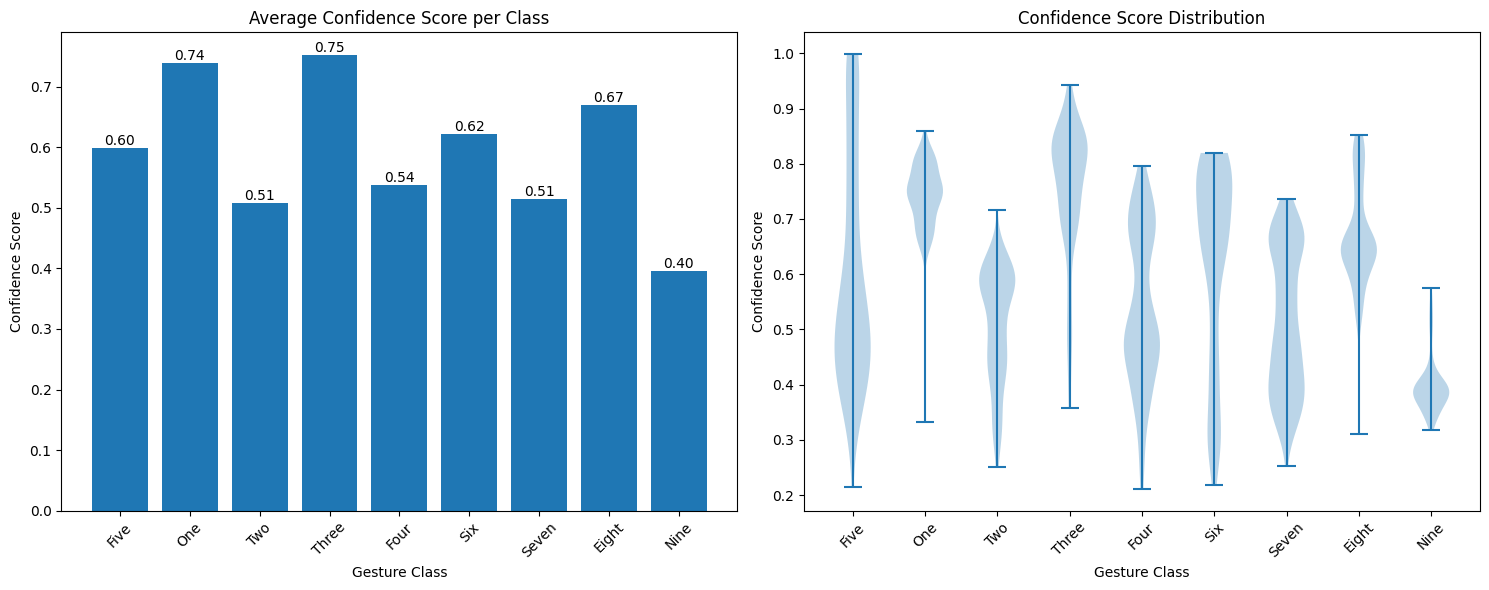


Confidence Score Statistics:
--------------------------------------------------

Class: Five
  Average confidence: 0.599
  Min confidence: 0.215
  Max confidence: 0.999
  Std deviation: 0.204

Class: One
  Average confidence: 0.739
  Min confidence: 0.332
  Max confidence: 0.860
  Std deviation: 0.067

Class: Two
  Average confidence: 0.508
  Min confidence: 0.250
  Max confidence: 0.715
  Std deviation: 0.103

Class: Three
  Average confidence: 0.752
  Min confidence: 0.357
  Max confidence: 0.943
  Std deviation: 0.123

Class: Four
  Average confidence: 0.537
  Min confidence: 0.211
  Max confidence: 0.795
  Std deviation: 0.140

Class: Six
  Average confidence: 0.623
  Min confidence: 0.219
  Max confidence: 0.820
  Std deviation: 0.176

Class: Seven
  Average confidence: 0.514
  Min confidence: 0.252
  Max confidence: 0.737
  Std deviation: 0.129

Class: Eight
  Average confidence: 0.670
  Min confidence: 0.311
  Max confidence: 0.852
  Std deviation: 0.090

Class: Nine
  Average 

In [206]:
# Add this function after your existing visualization functions
def visualize_confidence_scores(model, X_test, y_test, labels, save_path='model/evaluation/'):
    """Visualize prediction confidence scores with charts"""
    import os
    
    # Get model predictions and confidence scores
    predictions = model.predict(X_test)
    y_pred = np.argmax(predictions, axis=1)
    
    # Create figure for confidence visualization
    plt.figure(figsize=(15, 6))
    
    # 1. Bar chart of average confidence per class
    plt.subplot(1, 2, 1)
    avg_confidence = []
    for i in range(len(labels)):
        mask = y_test == i
        if np.any(mask):
            class_confidence = predictions[mask].max(axis=1)
            avg_confidence.append(np.mean(class_confidence))
        else:
            avg_confidence.append(0)
    
    bars = plt.bar(labels, avg_confidence)
    plt.title('Average Confidence Score per Class')
    plt.xlabel('Gesture Class')
    plt.ylabel('Confidence Score')
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    # 2. Confidence distribution violin plot
    plt.subplot(1, 2, 2)
    confidence_data = []
    for i in range(len(labels)):
        mask = y_test == i
        if np.any(mask):
            class_confidence = predictions[mask].max(axis=1)
            confidence_data.append(class_confidence)
        else:
            confidence_data.append([])
    
    violin_parts = plt.violinplot(confidence_data)
    plt.title('Confidence Score Distribution')
    plt.xlabel('Gesture Class')
    plt.ylabel('Confidence Score')
    plt.xticks(range(1, len(labels) + 1), labels, rotation=45)
    
    # Adjust layout and save
    plt.tight_layout()
    
    # Save plot if save_path provided
    if save_path:
        os.makedirs(save_path, exist_ok=True)
        plt.savefig(os.path.join(save_path, 'confidence_analysis.png'), 
                    bbox_inches='tight', dpi=300)
    
    plt.show()
    
    # Print detailed confidence statistics
    print("\nConfidence Score Statistics:")
    print("-" * 50)
    for i, label in enumerate(labels):
        mask = y_test == i
        if np.any(mask):
            conf_scores = predictions[mask].max(axis=1)
            print(f"\nClass: {label}")
            print(f"  Average confidence: {np.mean(conf_scores):.3f}")
            print(f"  Min confidence: {np.min(conf_scores):.3f}")
            print(f"  Max confidence: {np.max(conf_scores):.3f}")
            print(f"  Std deviation: {np.std(conf_scores):.3f}")

# Add this code after model evaluation
# Load labels if not already loaded
labels = []
with open('model/keypoint_classifier/keypoint_classifier_label.csv', 
          encoding='utf-8-sig') as f:
    for row in csv.reader(f):
        labels.append(row[0])

# Generate confidence visualization
visualize_confidence_scores(model, X_test, y_test, labels)

# Tensorflow-Lite Convert to a model for

In [207]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [208]:
# Transform the model (quantize it)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmpu8vyith6\assets


INFO:tensorflow:Assets written to: C:\Users\Abhis\AppData\Local\Temp\tmpu8vyith6\assets


6844

# Reasoning test

In [209]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [210]:
# Get input/output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [211]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [212]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [213]:
#print(np.squeeze(tflite_results))
#print(np.argmax(np.squeeze(tflite_results)))

In [214]:
def benchmark_model(model, X_test):
    """Measure model performance metrics"""
    import time
    
    # Warm-up run
    model.predict(X_test[:1])
    
    # Measure inference time
    start_time = time.time()
    predictions = model.predict(X_test)
    end_time = time.time()
    
    avg_inference_time = (end_time - start_time) / len(X_test) * 1000  # ms
    
    print("\nModel Performance Metrics:")
    print("-" * 50)
    print(f"Average Inference Time: {avg_inference_time:.2f} ms")
    print(f"Model Size: {os.path.getsize('model/keypoint_classifier/keypoint_classifier.keras')/1024:.2f} KB")
    print(f"Input Shape: {model.input_shape}")
    print(f"Number of Parameters: {model.count_params():,}")